In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mock_T1(t):
    result = np.zeros(3)
    t2 = 2.5 * 150
    t1 = 1.75 * 150

    for i in range(2048):
        if (not result[0] and (t[0][i] > t2)):
            if (t[1][i] > t1 and t[2][i] > t1): result[0] = 1

        if (not result[1] and (t[1][i] > t2)):
            if (t[0][i] > t1 and t[2][i] > t1): result[1] = 1

        if (not result[2] and (t[2][i] > t2)):
            if (t[0][i] > t1 and t[1][i] > t1): result[2] = 1

        if 1 == result[0] == result[1] == result[2]: break
    
    return result

In [2]:
ids = ["41", "05", "02", "01", "06", "23", "22", "04", "38", "29", "00", "03"]

for id in ids:
    file = f"/cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms00{id}_WCD.dat"
    traces = np.loadtxt(file)
    traces = np.split(traces, len(traces) // 3)

    bins = np.arange(-50, 250, 1)
    b1, b2, b3 = [np.zeros(299) for _ in range(3)]
    triggers = np.zeros(3)

    for trace in traces:
        trace = trace[:,1:] - trace[:,0, None]
        b1 += np.histogram(trace[0], bins = bins)[0]
        b2 += np.histogram(trace[1], bins = bins)[0]
        b3 += np.histogram(trace[2], bins = bins)[0]

        triggers += mock_T1(trace)

    print(triggers, f"triggers found in {file}")

[11.  8.  7.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0041_WCD.dat
[15. 13. 12.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0005_WCD.dat
[12.  5.  9.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0002_WCD.dat
[21. 11. 11.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0001_WCD.dat
[11.  4.  9.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0006_WCD.dat
[20. 13. 12.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0023_WCD.dat
[15. 10.  9.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0022_WCD.dat
[13. 10. 12.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0004_WCD.dat
[12.  8.  9.] triggers found in /cr/tempdata01/filip/iRODS/UubRandoms/converted/Jaco/randoms0038_WCD.dat
[6. 4. 1.] triggers found in /cr/tempdata01/filip/iRODS

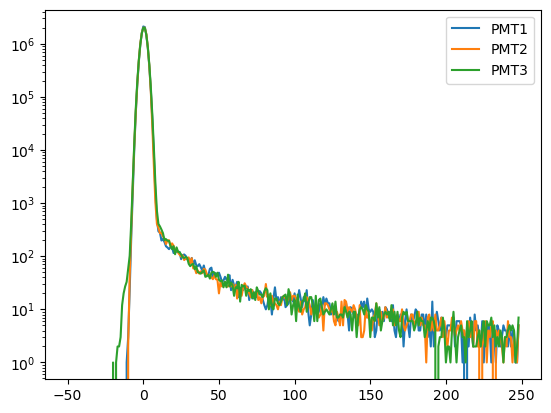

In [3]:
plt.plot(np.arange(-50, 249, 1), b1, label = "PMT1")
plt.plot(np.arange(-50, 249, 1), b2, label = "PMT2")
plt.plot(np.arange(-50, 249, 1), b3, label = "PMT3")

plt.legend()
plt.yscale("log")

In [7]:
print(traces[0].shape)

print(traces[0][0][:10])
print(traces[0][1][:10])
print(traces[0][2][:10])

(3, 2049)
[241. 242. 244. 241. 240. 241. 241. 241. 241. 240.]
[250. 249. 248. 248. 251. 252. 249. 250. 251. 251.]
[242. 246. 241. 241. 242. 241. 244. 238. 241. 241.]
